In [19]:
import matplotlib.pyplot as plt
import random

In [25]:
def visualize(seed):
    with open(f"../tools/in/{seed:04}.txt") as f:
        answers = list(map(lambda s: int(s.replace("\n", "")), f.readlines()[1:-1]))

    with open(f"../data/visualizer.log") as f:
        n, m = map(int, f.readline().split())
        eps = float(f.readline())
        raw_g = []
        g = []

        def s_to_degree_hist(s):
            degrees = [0] * n
            it = 0
            for i in range(0, n):
                for j in range(i + 1, n):
                    if s[it] == "1":
                        degrees[i] += 1
                        degrees[j] += 1
                    it += 1
            return sorted(degrees)

        for _ in range(m):
            raw_g.append(f.readline())
            g.append(s_to_degree_hist(raw_g[-1]))

        _ = f.readline()

        xs = list(range(n))

        def operate(s, eps):
            t = ""
            for i in range(len(s)):
                if random.random() < eps:
                    t += "0" if s[i] == "1" else "1"
                else:
                    t += s[i]
            return t

        def simulate(s, eps):
            samples = [0] * n
            simulate_count = 10
            for _ in range(simulate_count):
                sample = s_to_degree_hist(operate(s, eps))
                for i in range(n):
                    samples[i] += sample[i] / simulate_count
            return samples

        def vis(q, h, t, s):
            fig, ax = plt.subplots()
            ax.plot(xs, h, label="input")
            ax.plot(xs, g[s], label=f"predict: {s}")
            ax.plot(xs, g[t], label=f"correct: {t}")
            ax.plot(xs, simulate(raw_g[s], eps), label=f"simulated predict: {s}")
            ax.plot(xs, simulate(raw_g[t], eps), label=f"simulated correct: {t}")
            ax.set_title(f"Case {q}")
            # ax.set_ylim(0, n)
            fig.legend()
            fig.show()

        for q in range(100):
            h = s_to_degree_hist(f.readline())
            expected = int(f.readline())

            answer = answers[q]
            if answer != expected:
                vis(q, h, answer, expected)

/var/folders/3n/z49mbd414cx0_x991z2fyqjc0000gn/T/ipykernel_39278/2087133771.py:58: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


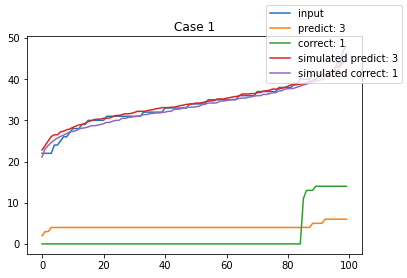

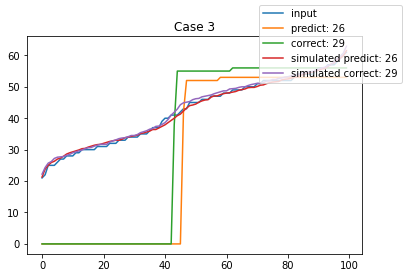

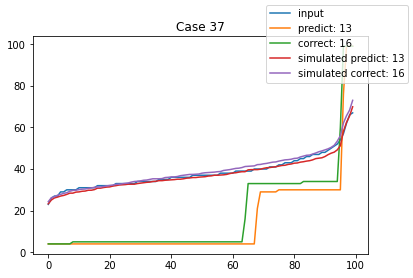

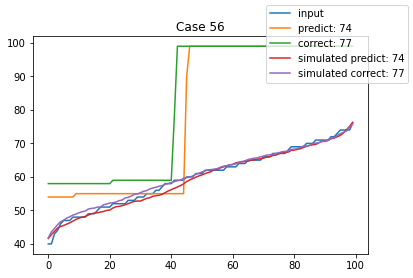

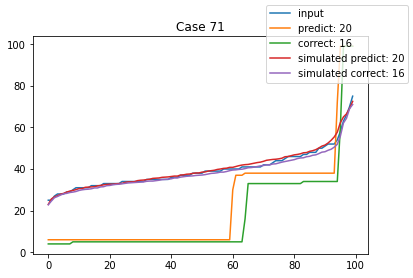

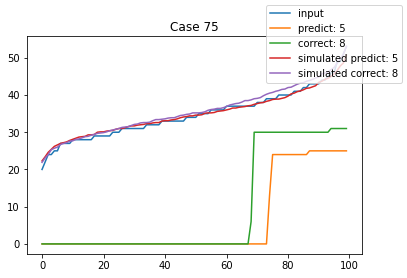

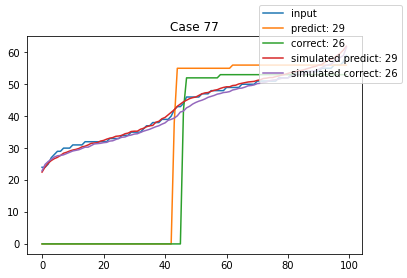

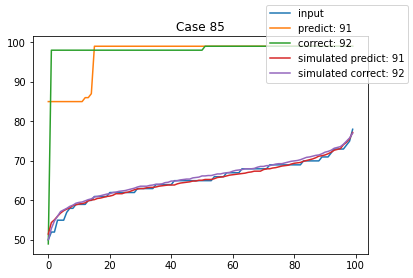

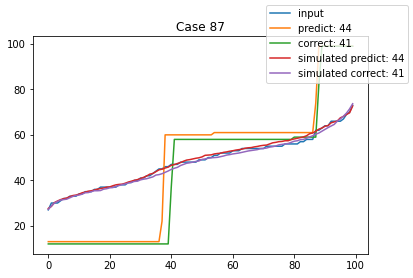

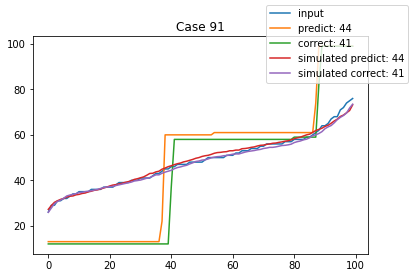

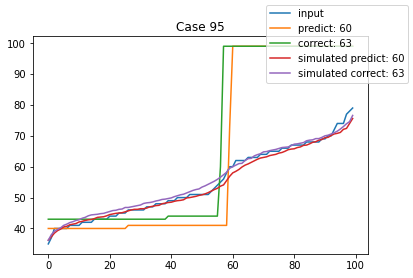

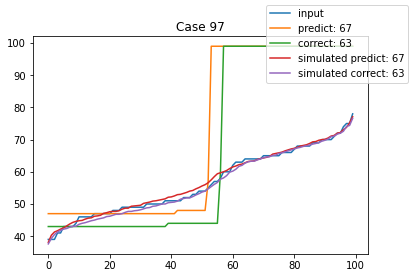

In [26]:
seed = 77
visualize(seed)